# Twitter Sentiment Analysis



## Import libraries

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Viewing the dataset

### Load

In [3]:
#colnames=['score', 'id', 'date', 'flag', 'user', 'tweet']
#tweets_df = pd.read_csv("data/twitter.csv", encoding="latin-1", names=colnames)

tweets_df = pd.read_csv("data/twitter_alt.csv")

### View

Top

In [4]:
tweets_df.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Bottom

In [5]:
tweets_df.tail(20)

,id,label,tweet
31942,31943,0,this week is flying by #humpday - #wednesday...
31943,31944,0,@user modeling photoshoot this friday yay #mo...
31944,31945,0,you're surrounded by people who love you (even...
31945,31946,0,feel like... ðð¶ð #dog #summer #hot #h...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."
31949,31950,0,hear one of my new songs! don't go - katie ell...
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt..."
31951,31952,0,i've just posted a new blog: #secondlife #lone...


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
tweets_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Pre-Processing the data

We need to select which columns are more useful to get the results. After analysing the data, it was decided that the following columns are going to be used: **label** and **tweet**.

In [9]:
#tweets_df = tweets_df.drop(['id', 'date', 'flag', 'user'], axis=1)
#tweets_df = tweets_df[['tweet', 'score']]

tweets_df = tweets_df.drop(['id'], axis=1)

In [10]:
tweets_df.head(20)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [11]:
tweets_df.tail(20)

,label,tweet
31942,0,this week is flying by #humpday - #wednesday...
31943,0,@user modeling photoshoot this friday yay #mo...
31944,0,you're surrounded by people who love you (even...
31945,0,feel like... ðð¶ð #dog #summer #hot #h...
31946,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,1,@user @user you don't have the balls to hashta...
31948,1,"makes you ask yourself, who am i? then am i a..."
31949,0,hear one of my new songs! don't go - katie ell...
31950,0,"@user you can try to 'tail' us to stop, 'butt..."
31951,0,i've just posted a new blog: #secondlife #lone...


## Visualizing the data

In [12]:
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]

### WordCloud

In [13]:
sentences = tweets_df['tweet'].tolist()
sentences_as_one_string = " ".join(sentences)

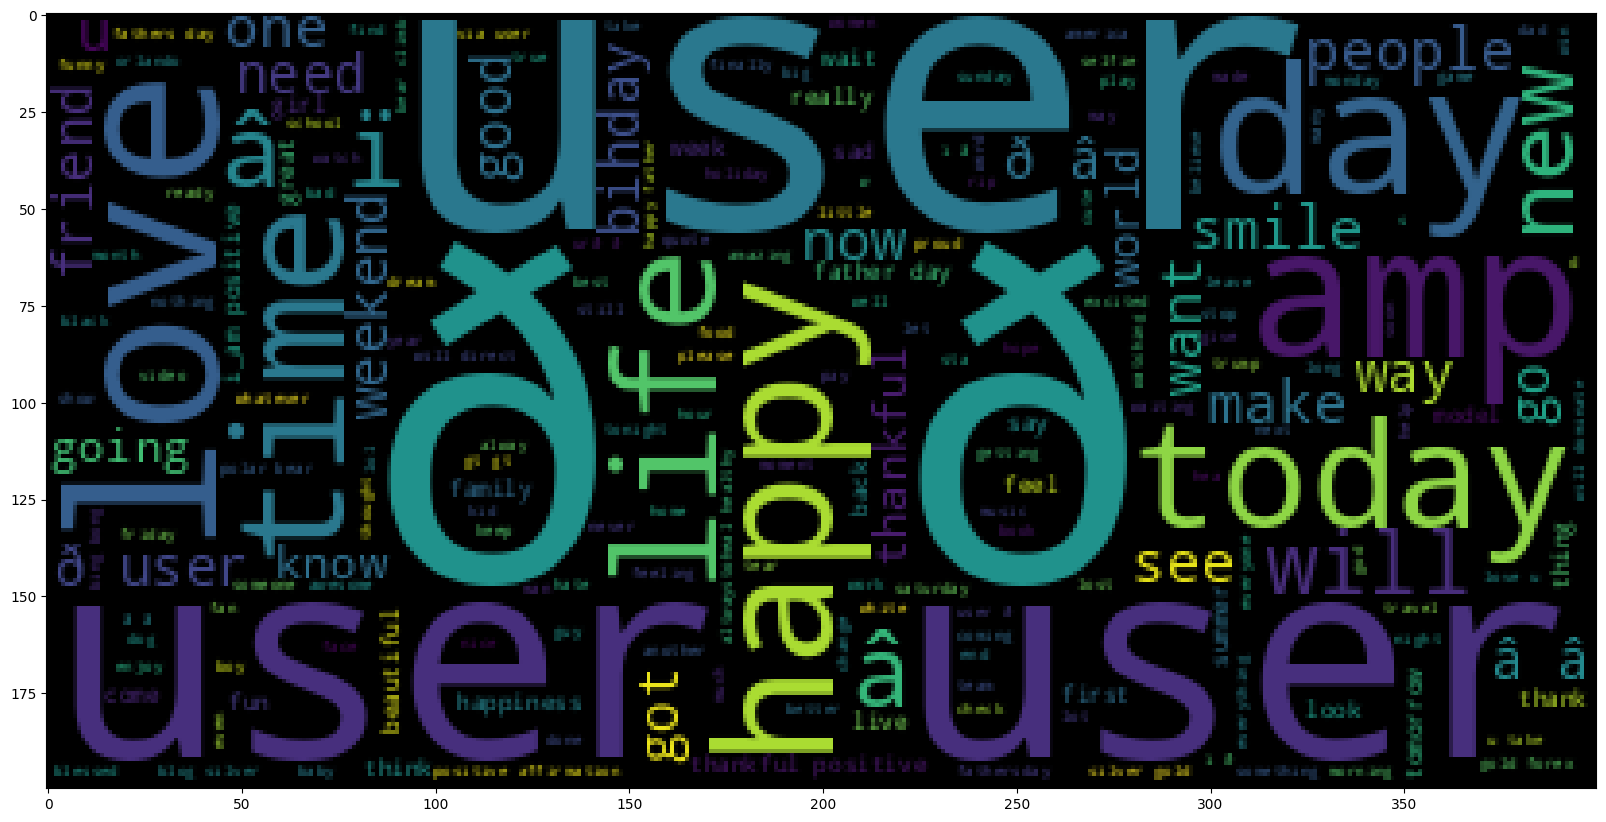

In [14]:
from wordcloud import WordCloud

plt.figure(figsize=(20,30))
plt.imshow((WordCloud().generate(sentences_as_one_string)))

#### Positive

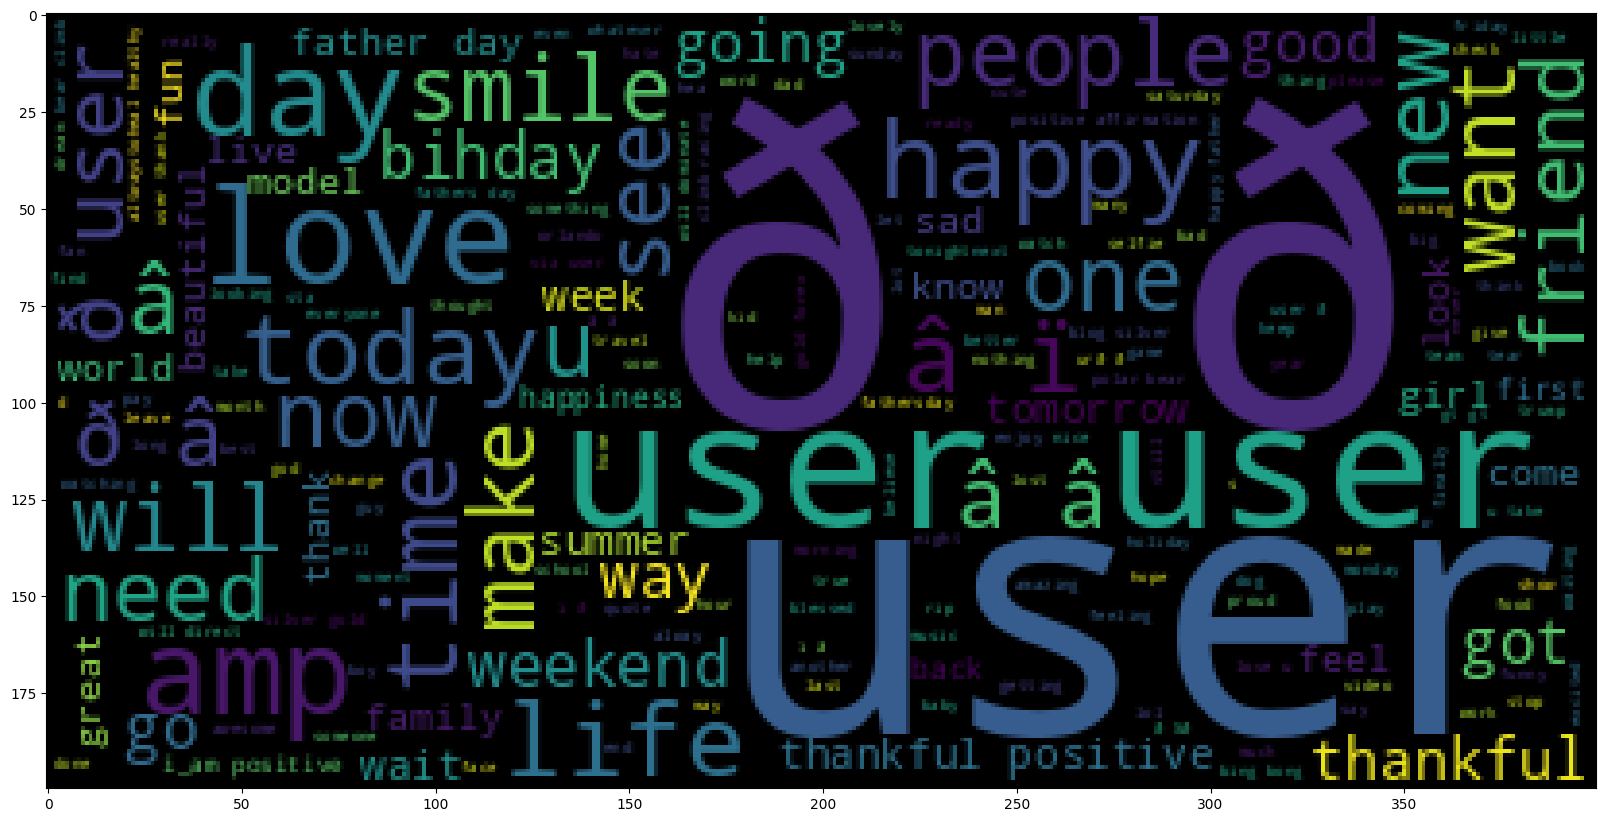

In [15]:
sentences_positive = positive["tweet"].tolist()
sentences_positive_as_one_string = " ".join(sentences_positive)

plt.figure(figsize=(20,30))
plt.imshow((WordCloud().generate(sentences_positive_as_one_string)))

#### Negative

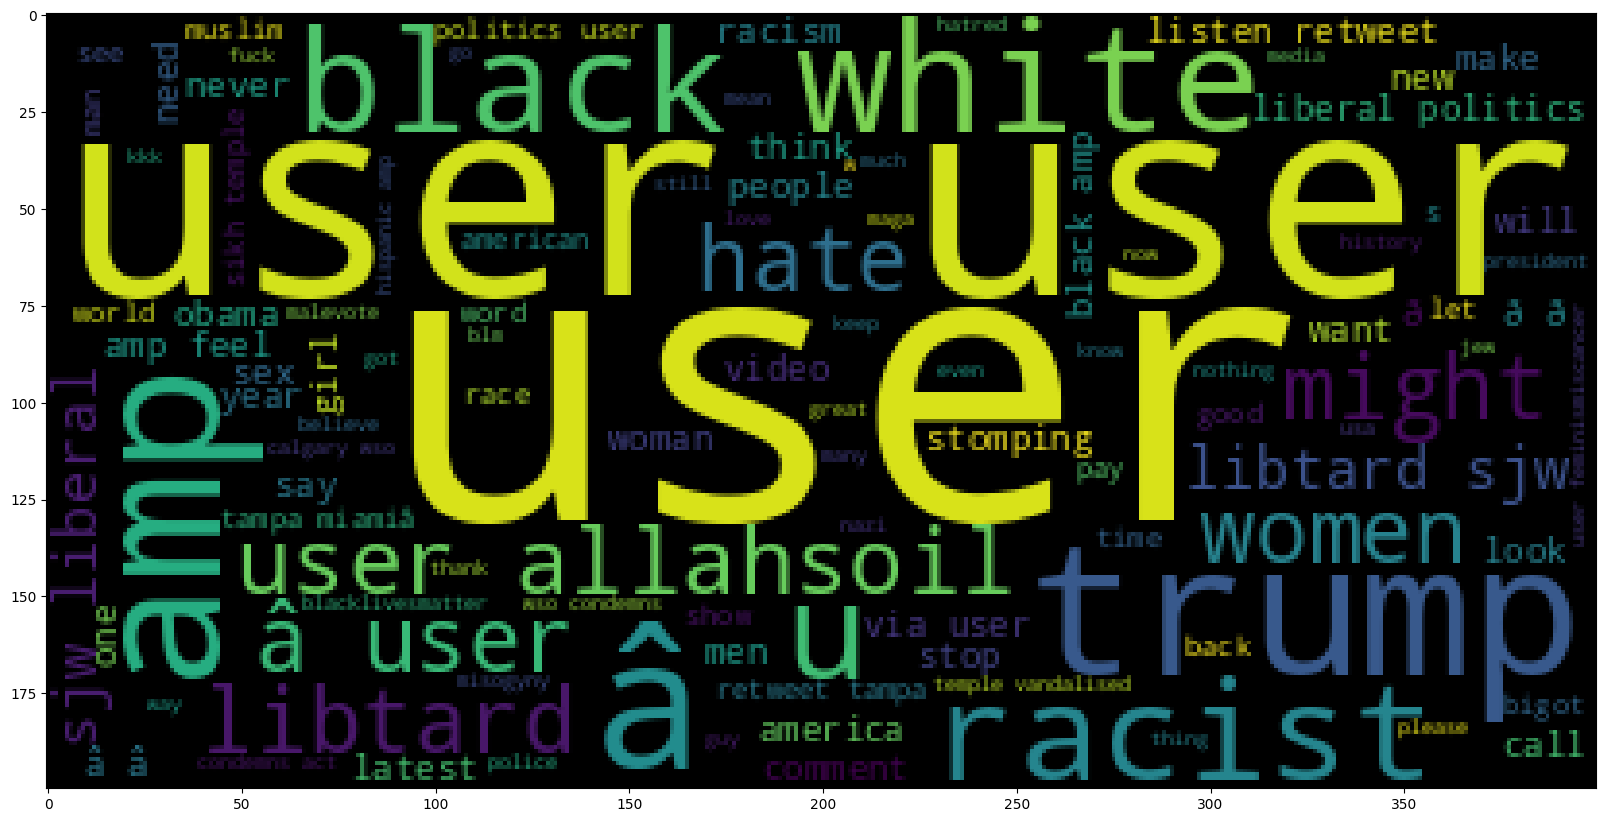

In [16]:
sentences_negative = negative["tweet"].tolist()
sentences_negative_as_one_string = " ".join(sentences_negative)

plt.figure(figsize=(20,30))
plt.imshow((WordCloud().generate(sentences_negative_as_one_string)))

### Countplot

<Axes: xlabel='label', ylabel='count'>

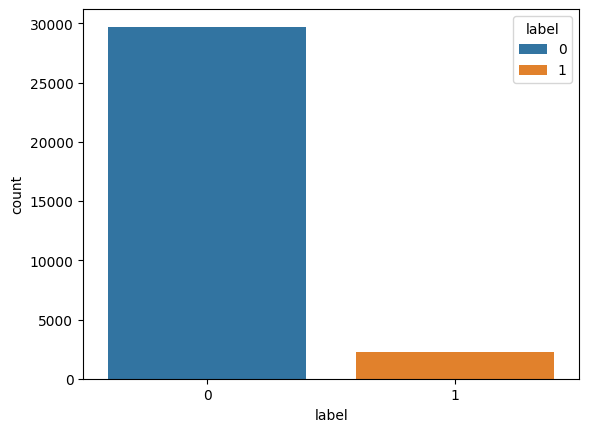

In [17]:
sns.countplot(x='label', data=tweets_df, hue='label')


## Cleaning the data

### Punctuation

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Stopwords

In [19]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Pipeline for removing the punctuation and stopwords

In [20]:
def tweet_cleaning(tweet):
    tweet_punc_removed = [char for char in tweet if char not in string.punctuation]
    tweet_punc_removed_join = "".join(tweet_punc_removed)
    
    tweet_cleaned = [word for word in tweet_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

    return tweet_cleaned

In [21]:
tweets_df_clean = tweets_df["tweet"].apply(tweet_cleaning)

In [22]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


### Performing Count Vectorization

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = tweet_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [24]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [25]:
#vectorizer = CountVectorizer(analyzer=tweet_cleaning, dtype=np.uint8, max_features=500)
#tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
tweets_countvectorizer.shape

(31962, 47386)

## Training and Evaluating Model

In this case, it is going to be used a naive Bayes Classifier model.

In [27]:
#desired_memory_size = 1e+3
#X = np.empty((1600000, int(desired_memory_size)), dtype=np.uint8)

X = pd.DataFrame(tweets_countvectorizer.toarray())

In [28]:
y = tweets_df['label']

In [29]:
X.shape

(31962, 47386)

In [30]:
y.shape

(31962,)

### Train and test the model

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

### Predict the Test set results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))